# Deeper CNNs

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu',
                 input_shape=(x_train.shape[1:])))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))

In [4]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, 
          validation_split=0.2, 
          epochs=3, batch_size=100)

# Evaluate the model on test data
model.evaluate(x_test, y_test, batch_size=100)

Epoch 1/3
400/400 [==============================] - 28s 70ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 2/3
400/400 [==============================] - 27s 67ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 3/3
100/100 [==============================] - 3s 26ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]

## Number of parameters?

In [5]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model - how many parameters?
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


## Write your own pooling operation

CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through.

In [6]:
im = plt.imread('data/corners_building_top.jpg')

In [7]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

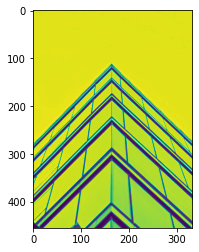

In [8]:
plt.imshow(result)

The resulting image is smaller, but retains the salient features in every location

## Keras pooling layers

In [9]:
model = Sequential()

In [10]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(x_train.shape[1:])))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 15)        195       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 5)         305       
_________________________________________________________________
flatten_2 (Flatten)          (None, 980)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 981       
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(x_test, y_test, batch_size=10)

Epoch 1/3
4000/4000 [==============================] - 34s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 2/3
4000/4000 [==============================] - 33s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 3/3
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]